In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import scipy
from scipy.stats import skew
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r'/home/aayush/Desktop/Leaderboards_Data/Total_score.csv'
df= pd.read_csv(path)

In [3]:
top_data=r'/home/aayush/Desktop/Leaderboards_Data/Top_5_NEW_Scores.csv'
top_df= pd.read_csv(top_data)
top_df.shape

(477, 17)

In [3]:
df.drop(df.columns[[0,1]],axis=1,inplace=True)

In [4]:
df

active_status  blog_score  book_score  conference_score  \
0                   1           0           0                 0   
1                   1           0           0                 0   
2                   1           0           0                 0   
3                   0           0           0                 0   
4                   1           0           0                 0   
...               ...         ...         ...               ...   
203062              1           0           0                 0   
203063              1           0           0                 0   
203064              1           0           0                 0   
203065              1           0           0                 0   
203066              1           0           0                 0   

                   full_name  knolder_id  knolx_score  oscontribution_score  \
0           Sidharth Khattri           1            0                     0   
1        Manish Kumar Mishra           2            0                     0   
2              Narayan Kumar           3            0                     0   
3       Pranjut Protim Gogoi           4            0                     0   
4        Gaurav Kumar Shukla           5            0                     0   
...                      ...         ...          ...                   ...   
203062           arpit.gupta         344            0                     0   
203063        Devanshu Verma         345            0                     0   
203064        navdeep.parash         346            0                     0   
203065         akshat.mathur         347            0                     0   
203066          gvijay.kumar         348            0                     0   

       quarter  researchpaper_score  studio_id                studio_name  \
0           Q1                    0        8.0               Scala Studio   
1           Q1                    0       11.0                Java Studio   
2           Q1                    0        8.0               Scala Studio   
3           Q1                    0        NaN                        NaN   
4           Q1                    0       17.0  Testing Automation Studio   
...        ...                  ...        ...                        ...   
203062      Q4                    0        9.0                    Interns   
203063      Q4                    0        9.0                    Interns   
203064      Q4                    0        9.0                    Interns   
203065      Q4                    0       11.0                Java Studio   
203066      Q4                    0        4.0              DevOps Studio   

        techhub_score  webinar_score  year  total_score  
0                   0              0  2010            0  
1                   0              0  2010            0  
2                   0              0  2010            0  
3                   0              0  2010            0  
4                   0              0  2010            0  
...               ...            ...   ...          ...  
203062              0              0  2233            0  
203063              0              0  2233            0  
203064              0              0  2233            0  
203065              0              0  2233            0  
203066              0              0  2233            0  

[203067 rows x 16 columns]

In [34]:
ls=['knolx_score','oscontribution_score','techhub_score']
df['total']='Nan'
for i in ls:
    df['total_score']= df['total_score'] + df[i]

In [7]:
studio =list(df.studio_id.unique())

In [5]:
df.dropna(subset=['studio_name'])

active_status  blog_score  book_score  conference_score  \
0                   1           0           0                 0   
1                   1           0           0                 0   
2                   1           0           0                 0   
4                   1           0           0                 0   
10                  1           0           0                 0   
...               ...         ...         ...               ...   
203062              1           0           0                 0   
203063              1           0           0                 0   
203064              1           0           0                 0   
203065              1           0           0                 0   
203066              1           0           0                 0   

                  full_name  knolder_id  knolx_score  oscontribution_score  \
0          Sidharth Khattri           1            0                     0   
1       Manish Kumar Mishra           2            0                     0   
2             Narayan Kumar           3            0                     0   
4       Gaurav Kumar Shukla           5            0                     0   
10          Prabhat Kashyap          11            0                     0   
...                     ...         ...          ...                   ...   
203062          arpit.gupta         344            0                     0   
203063       Devanshu Verma         345            0                     0   
203064       navdeep.parash         346            0                     0   
203065        akshat.mathur         347            0                     0   
203066         gvijay.kumar         348            0                     0   

       quarter  researchpaper_score  studio_id                studio_name  \
0           Q1                    0        8.0               Scala Studio   
1           Q1                    0       11.0                Java Studio   
2           Q1                    0        8.0               Scala Studio   
4           Q1                    0       17.0  Testing Automation Studio   
10          Q1                    0        8.0               Scala Studio   
...        ...                  ...        ...                        ...   
203062      Q4                    0        9.0                    Interns   
203063      Q4                    0        9.0                    Interns   
203064      Q4                    0        9.0                    Interns   
203065      Q4                    0       11.0                Java Studio   
203066      Q4                    0        4.0              DevOps Studio   

        techhub_score  webinar_score  year  total_score  
0                   0              0  2010            0  
1                   0              0  2010            0  
2                   0              0  2010            0  
4                   0              0  2010            0  
10                  0              0  2010            0  
...               ...            ...   ...          ...  
203062              0              0  2233            0  
203063              0              0  2233            0  
203064              0              0  2233            0  
203065              0              0  2233            0  
203066              0              0  2233            0  

[188132 rows x 16 columns]

In [8]:
studio

[8.0,
 11.0,
 nan,
 17.0,
 4.0,
 15.0,
 13.0,
 14.0,
 3.0,
 16.0,
 5.0,
 7.0,
 6.0,
 1.0,
 20.0,
 19.0,
 12.0,
 2.0,
 9.0,
 18.0]

In [8]:
df.studio_name.unique()

array(['Scala Studio', 'Java Studio', nan, 'Testing Automation Studio',
       'DevOps Studio', 'Marketing', 'Lightbend CoE', 'Management',
       'AI/ML Studio', 'Rust Studio', 'Engineering Operations',
       'Frontend Studio', 'Finance and Compliance', 'Account Management',
       'People & Culture', 'Talent Acquisition',
       'Learning and Development', 'Agile Studio', 'Interns',
       'Admin & IT'], dtype=object)

In [9]:
df.columns

Index(['active_status', 'blog_score', 'book_score', 'conference_score',
       'full_name', 'knolder_id', 'knolx_score', 'oscontribution_score',
       'quarter', 'researchpaper_score', 'studio_id', 'studio_name',
       'techhub_score', 'webinar_score', 'year', 'total_score', 'total'],
      dtype='object')

In [4]:
Studio =list(top_df.studio_id.unique())

In [5]:
Studio

[8.0,
 11.0,
 17.0,
 4.0,
 15.0,
 13.0,
 14.0,
 3.0,
 16.0,
 5.0,
 7.0,
 1.0,
 12.0,
 2.0,
 9.0]

In [6]:
top_df

Unnamed: 0  active_status  blog_score  book_score  conference_score  \
0             0              1          10           0                 0   
1             1              1          10           0                 0   
2             2              1          15           0                 0   
3             3              1          15           0                 0   
4             4              1          10           0                 0   
..          ...            ...         ...         ...               ...   
472         472              1           0         100               100   
473         473              1           0           0                 0   
474         474              1          20           0                 0   
475         475              1          10           0                 0   
476         476              1          10           0                 0   

            full_name  knolder_id  knolx_score  oscontribution_score quarter  \
0    Sidharth Khattri           1            0                     0      Q1   
1    Sidharth Khattri           1            0                     0      Q2   
2    Sidharth Khattri           1            0                     0      Q3   
3    Sidharth Khattri           1            0                     0      Q4   
4       Narayan Kumar           3            0                     0      Q2   
..                ...         ...          ...                   ...     ...   
472   anirudh.chauhan         376           20                     0      Q1   
473    abhishek.singh         377           40                     0      Q1   
474         aasif.ali         328            0                     0      Q1   
475      akshit.kumar         335            0                     0      Q1   
476  chiranjeev.kumar         338            0                     0      Q1   

     researchpaper_score  studio_id   studio_name  techhub_score  \
0                      0        8.0  Scala Studio              0   
1                      0        8.0  Scala Studio              0   
2                      0        8.0  Scala Studio              0   
3                      0        8.0  Scala Studio              0   
4                      0        8.0  Scala Studio              0   
..                   ...        ...           ...            ...   
472                   50        9.0       Interns              0   
473                    0        9.0       Interns              0   
474                    0        9.0       Interns              0   
475                    0        9.0       Interns              0   
476                    0        9.0       Interns              0   

     webinar_score  year  total_score  
0                0  2014           10  
1                0  2014           10  
2                0  2014           15  
3                0  2014           15  
4                0  2015           10  
..             ...   ...          ...  
472              0  2022          290  
473              0  2022           80  
474              0  2022           20  
475              0  2022           10  
476              0  2022           10  

[477 rows x 17 columns]

In [7]:
columns=top_df.columns
dataframe = pd.DataFrame(columns = columns)




for o in Studio:
    Q1=top_df.loc[(top_df['quarter']=='Q1') & (top_df['year']<=2022) & (top_df['studio_id'] == o)]
    Q2=top_df.loc[(top_df['quarter']=='Q2') & (top_df['year']<=2022) & (top_df['studio_id'] == o)]
    Q3=top_df.loc[(top_df['quarter']=='Q3') & (top_df['year']<=2022) & (top_df['studio_id'] == o)]
    Q4=top_df.loc[(top_df['quarter']=='Q4') & (top_df['year']<=2022) & (top_df['studio_id'] == o)]
    
    years = list(Q1['year'].unique())
    
    for index in years:
        temp_Q1 = Q1.loc[Q1['year']==index]
        top_5_Q1 = list(temp_Q1['total_score'].nlargest(n=1).unique())
        for i in top_5_Q1:
            if i != 0:
                dataframe = dataframe.append(temp_Q1.loc[(temp_Q1['total_score']==i)], ignore_index = True)
    
        temp_Q2 = Q2.loc[Q2['year']==index]
        top_5_Q2 = list(temp_Q2['total_score'].nlargest(n=1).unique())
        for i in top_5_Q2:
            if i != 0:
                dataframe = dataframe.append(temp_Q2.loc[(temp_Q2['total_score']==i)], ignore_index = True)
            
        temp_Q3 = Q3.loc[Q3['year']==index]
        top_5_Q3 = list(temp_Q3['total_score'].nlargest(n=1).unique())
        for i in top_5_Q3:
            if i != 0:
                dataframe = dataframe.append(temp_Q3.loc[(temp_Q3['total_score']==i)], ignore_index = True)
            
        temp_Q4 = Q4.loc[Q4['year']==index]
        top_5_Q4 = list(temp_Q4['total_score'].nlargest(n=1).unique())
        for i in top_5_Q4:
            if i != 0:
                dataframe = dataframe.append(temp_Q4.loc[(temp_Q4['total_score']==i)], ignore_index = True)
    
    
    


In [104]:
years

[2022]

In [88]:
columns=top_df.columns
dataframe = pd.DataFrame(columns = columns)




for o in Studio:
    Q1=top_df.loc[(top_df['quarter']=='Q1') & (top_df['year']<=2022) & (top_df['studio_id'] == o)]
    Q2=top_df.loc[(top_df['quarter']=='Q2') & (top_df['year']<=2022) & (top_df['studio_id'] == o)]
    Q3=top_df.loc[(top_df['quarter']=='Q3') & (top_df['year']<=2022) & (top_df['studio_id'] == o)]
    Q4=top_df.loc[(top_df['quarter']=='Q4') & (top_df['year']<=2022) & (top_df['studio_id'] == o)]
    
    years = list(Q1['year'].unique())
    
    for index in years:
        temp_Q1 = Q1.loc[Q1['year']==index]
        top_5_Q1 = list(temp_Q1['knolx_score'].nlargest(n=1).unique())
        for i in top_5_Q1:
            dataframe = dataframe.append(temp_Q1.loc[(temp_Q1['knolx_score']==i)], ignore_index = True)
    
        temp_Q2 = Q2.loc[Q2['year']==index]
        top_5_Q2 = list(temp_Q2['knolx_score'].nlargest(n=1).unique())
        for i in top_5_Q2:
            dataframe = dataframe.append(temp_Q2.loc[(temp_Q2['knolx_score']==i)], ignore_index = True)
            
        temp_Q3 = Q3.loc[Q3['year']==index]
        top_5_Q3 = list(temp_Q3['knolx_score'].nlargest(n=1).unique())
        for i in top_5_Q3:
            dataframe = dataframe.append(temp_Q3.loc[(temp_Q3['knolx_score']==i)], ignore_index = True)
            
        temp_Q4 = Q4.loc[Q4['year']==index]
        top_5_Q4 = list(temp_Q4['knolx_score'].nlargest(n=1).unique())
        for i in top_5_Q4:
            dataframe = dataframe.append(temp_Q4.loc[(temp_Q4['knolx_score']==i)], ignore_index = True)

In [ ]:
columns=top_df.columns
dataframe = pd.DataFrame(columns = columns)




for o in Studio:
    Q1=top_df.loc[(top_df['quarter']=='Q1') & (top_df['year']<=2022) & (top_df['studio_id'] == o)]
    Q2=top_df.loc[(top_df['quarter']=='Q2') & (top_df['year']<=2022) & (top_df['studio_id'] == o)]
    Q3=top_df.loc[(top_df['quarter']=='Q3') & (top_df['year']<=2022) & (top_df['studio_id'] == o)]
    Q4=top_df.loc[(top_df['quarter']=='Q4') & (top_df['year']<=2022) & (top_df['studio_id'] == o)]
    
    years = list(Q1['year'].unique())
    
    for index in years:
        temp_Q1 = Q1.loc[Q1['year']==index]
        top_5_Q1 = list(temp_Q1['knolx_score'].nlargest(n=1).unique())
        for i in top_5_Q1:
            dataframe = dataframe.append(temp_Q1.loc[(temp_Q1['knolx_score']==i)], ignore_index = True)
    
        temp_Q2 = Q2.loc[Q2['year']==index]
        top_5_Q2 = list(temp_Q2['knolx_score'].nlargest(n=1).unique())
        for i in top_5_Q2:
            dataframe = dataframe.append(temp_Q2.loc[(temp_Q2['knolx_score']==i)], ignore_index = True)
            
        temp_Q3 = Q3.loc[Q3['year']==index]
        top_5_Q3 = list(temp_Q3['knolx_score'].nlargest(n=1).unique())
        for i in top_5_Q3:
            dataframe = dataframe.append(temp_Q3.loc[(temp_Q3['knolx_score']==i)], ignore_index = True)
            
        temp_Q4 = Q4.loc[Q4['year']==index]
        top_5_Q4 = list(temp_Q4['knolx_score'].nlargest(n=1).unique())
        for i in top_5_Q4:
            dataframe = dataframe.append(temp_Q4.loc[(temp_Q4['knolx_score']==i)], ignore_index = True)

In [12]:
columns=df.columns
dataframe = pd.DataFrame(columns = columns)




for o in studio:
    Q1=df.loc[(df['quarter']=='Q1') & (df['year']<=2022) & (df['studio_id'] == o)]
    Q2=df.loc[(df['quarter']=='Q2') & (df['year']<=2022) & (df['studio_id'] == o)]
    Q3=df.loc[(df['quarter']=='Q3') & (df['year']<=2022) & (df['studio_id'] == o)]
    Q4=df.loc[(df['quarter']=='Q4') & (df['year']<=2022) & (df['studio_id'] == o)]
    
    years = list(Q1['year'].unique())
    
    for index in years:
        temp_Q1 = Q1.loc[Q1['year']==index]
        top_5_Q1 = list(temp_Q1['knolx_score'].nlargest(n=1).unique())
        for i in top_5_Q1:
            dataframe = dataframe.append(temp_Q1.loc[(temp_Q1['knolx_score']==i)], ignore_index = True)
    
        temp_Q2 = Q2.loc[Q2['year']==index]
        top_5_Q2 = list(temp_Q2['knolx_score'].nlargest(n=1).unique())
        for i in top_5_Q2:
            dataframe = dataframe.append(temp_Q2.loc[(temp_Q2['knolx_score']==i)], ignore_index = True)
            
        temp_Q3 = Q3.loc[Q3['year']==index]
        top_5_Q3 = list(temp_Q3['knolx_score'].nlargest(n=1).unique())
        for i in top_5_Q3:
            dataframe = dataframe.append(temp_Q3.loc[(temp_Q3['knolx_score']==i)], ignore_index = True)
            
        temp_Q4 = Q4.loc[Q4['year']==index]
        top_5_Q4 = list(temp_Q4['knolx_score'].nlargest(n=1).unique())
        for i in top_5_Q4:
            dataframe = dataframe.append(temp_Q4.loc[(temp_Q4['knolx_score']==i)], ignore_index = True)

In [13]:
dataframe


active_status blog_score book_score conference_score  \
0                1          0          0                0   
1                1          0          0                0   
2                1          0          0                0   
3                0          0          0                0   
4                1          0          0                0   
...            ...        ...        ...              ...   
4557             1          0          0                0   
4558             1          0          0                0   
4559             1          0          0                0   
4560             1          0          0                0   
4561             1          0          0                0   

                 full_name knolder_id knolx_score oscontribution_score  \
0         Sidharth Khattri          1           0                    0   
1            Narayan Kumar          3           0                    0   
2          Prabhat Kashyap         11           0                    0   
3             Megha Jatana         16           0                    0   
4             Muskan Gupta         25           0                    0   
...                    ...        ...         ...                  ...   
4557  Navneet Kumar Bajpai        274           0                    0   
4558  Navneet Kumar Bajpai        274           0                    0   
4559  Navneet Kumar Bajpai        274           0                    0   
4560  Navneet Kumar Bajpai        274           0                    0   
4561  Navneet Kumar Bajpai        274           0                    0   

     quarter researchpaper_score  studio_id   studio_name techhub_score  \
0         Q1                   0        8.0  Scala Studio             0   
1         Q1                   0        8.0  Scala Studio             0   
2         Q1                   0        8.0  Scala Studio             0   
3         Q1                   0        8.0  Scala Studio             0   
4         Q1                   0        8.0  Scala Studio             0   
...      ...                 ...        ...           ...           ...   
4557      Q4                   0       18.0    Admin & IT             0   
4558      Q1                   0       18.0    Admin & IT             0   
4559      Q2                   0       18.0    Admin & IT             0   
4560      Q3                   0       18.0    Admin & IT             0   
4561      Q4                   0       18.0    Admin & IT             0   

     webinar_score  year total_score  
0                0  2010           0  
1                0  2010           0  
2                0  2010           0  
3                0  2010           0  
4                0  2010           0  
...            ...   ...         ...  
4557             0  2021           0  
4558             0  2022           0  
4559             0  2022           0  
4560             0  2022           0  
4561             0  2022           0  

[4562 rows x 16 columns]

In [14]:
pd.set_option('display.max_rows',None)

In [15]:
dataframe.shape

(4562, 16)

In [50]:
dataframe.drop('total',axis=1, inplace=True)

In [16]:
dataframe

active_status blog_score book_score conference_score  \
0                1          0          0                0   
1                1          0          0                0   
2                1          0          0                0   
3                0          0          0                0   
4                1          0          0                0   
5                1          0          0                0   
6                1          0          0                0   
7                0          0          0                0   
8                1          0          0                0   
9                0          0          0                0   
10               1          0          0                0   
11               1          0          0                0   
12               1          0          0                0   
13               1          0          0                0   
14               1          0          0                0   
15               0          0          0                0   
16               1          0          0                0   
17               1          0          0                0   
18               0          0          0                0   
19               1          0          0                0   
20               1          0          0                0   
21               1          0          0                0   
22               1          0          0                0   
23               1          0          0                0   
24               0          0          0                0   
25               1          0          0                0   
26               1          0          0                0   
27               0          0          0                0   
28               1          0          0                0   
29               1          0          0                0   
30               1          0          0                0   
31               1          0          0                0   
32               1          0          0                0   
33               1          0          0                0   
34               1          0          0                0   
35               1          0          0                0   
36               1          0          0                0   
37               1          0          0                0   
38               1          0          0                0   
39               0          0          0                0   
40               1          0          0                0   
41               1          0          0                0   
42               1          0          0                0   
43               1          0          0                0   
44               1          0          0                0   
45               1          0          0                0   
46               0          0          0                0   
47               1          0          0                0   
48               1          0          0                0   
49               1          0          0                0   
50               0          0          0                0   
51               1          0          0                0   
52               0          0          0                0   
53               1          0          0                0   
54               1          0          0                0   
55               1          0          0                0   
56               1          0          0                0   
57               1          0          0                0   
58               0          0          0                0   
59               1          0          0                0   
60               1          0          0                0   
61               0          0          0                0   
62               1          0          0                0   
63               1          0          0                0   
64               1          0          0

In [16]:
dataframe.to_csv('Top_5_NEW_Scores.csv')

In [17]:
score_max = dataframe[["year", "quarter", "knolx_score", "studio_name"]]

In [18]:
score_max.drop_duplicates(keep="first",inplace=True)

/home/aayush/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [20]:
score_max


year quarter knolx_score                studio_name
0     2010      Q1           0               Scala Studio
43    2010      Q2           0               Scala Studio
86    2010      Q3           0               Scala Studio
129   2010      Q4           0               Scala Studio
172   2011      Q1           0               Scala Studio
215   2011      Q2           0               Scala Studio
258   2011      Q3           0               Scala Studio
301   2011      Q4           0               Scala Studio
344   2012      Q1           0               Scala Studio
361   2012      Q2           0               Scala Studio
378   2012      Q3           0               Scala Studio
395   2012      Q4           0               Scala Studio
412   2013      Q1           0               Scala Studio
429   2013      Q2           0               Scala Studio
446   2013      Q3           0               Scala Studio
463   2013      Q4           0               Scala Studio
480   2014      Q1           0               Scala Studio
497   2014      Q2           0               Scala Studio
514   2014      Q3           0               Scala Studio
531   2014      Q4           0               Scala Studio
548   2015      Q1           0               Scala Studio
565   2015      Q2           0               Scala Studio
582   2015      Q3           0               Scala Studio
599   2015      Q4           0               Scala Studio
616   2016      Q1           0               Scala Studio
633   2016      Q2           0               Scala Studio
650   2016      Q3           0               Scala Studio
667   2016      Q4           0               Scala Studio
684   2017      Q1           0               Scala Studio
701   2017      Q2          20               Scala Studio
702   2017      Q3          20               Scala Studio
704   2017      Q4          20               Scala Studio
706   2018      Q1          20               Scala Studio
707   2018      Q2           0               Scala Studio
724   2018      Q3          80               Scala Studio
725   2018      Q4          80               Scala Studio
726   2019      Q1           0               Scala Studio
743   2019      Q2          20               Scala Studio
744   2019      Q3           0               Scala Studio
787   2019      Q4           0               Scala Studio
830   2020      Q1          20               Scala Studio
832   2020      Q2          20               Scala Studio
833   2020      Q3          20               Scala Studio
834   2020      Q4          20               Scala Studio
835   2021      Q1          80               Scala Studio
836   2021      Q2          40               Scala Studio
838   2021      Q3          40               Scala Studio
839   2021      Q4          40               Scala Studio
840   2022      Q1          60               Scala Studio
841   2022      Q2           0               Scala Studio
886   2022      Q3           0               Scala Studio
931   2022      Q4           0               Scala Studio
976   2010      Q1           0                Java Studio
1009  2010      Q2           0                Java Studio
1042  2010      Q3           0                Java Studio
1075  2010      Q4           0                Java Studio
1108  2011      Q1           0                Java Studio
1141  2011      Q2           0                Java Studio
1174  2011      Q3           0                Java Studio
1207  2011      Q4           0                Java Studio
1240  2012      Q1           0                Java Studio
1247  2012      Q2           0                Java Studio
1254  2012      Q3           0                Java Studio
1261  2012      Q4           0                Java Studio
1268  2013      Q1           0                Java Studio
1275  2013      Q2           0                Java Studio
1282  2013      Q3           0                Java Studio
1289  2013      Q4           0                Java Studio
1296

In [58]:
score_max.to_csv('Max_quar_total_Scores.csv')

In [79]:
dataframe

Unnamed: 0 active_status blog_score book_score conference_score  \
0            0             1         10          0                0   
1            1             1         10          0                0   
2            2             1         15          0                0   
3            3             1         15          0                0   
4            7             1         15          0                0   
5            8             1         10          0                0   
6            9             1          5          0                0   
7           10             1          5          0                0   
8           11             1          5          0                0   
9           12             0          5          0                0   
10          13             1         10          0                0   
11          14             0          5          0                0   
12          15             1         10          0                0   
13          16             0          5          0                0   
14          17             1         25          0                0   
15          18             1         10          0                0   
16          19             1          5          0                0   
17          20             0          5          0                0   
18          21             1         10          0                0   
19          25             1         10          0                0   
20          26             1          5          0                0   
21          30             1         10          0                0   
22          31             1          5          0                0   
23          35             1          5          0                0   
24          39             1         15          0                0   
25          40             1          5          0                0   
26          41             1          5          0                0   
27          42             0          5          0                0   
28          43             1          0          0                0   
29          45             1          0          0                0   
30          47             1          5        100                0   
31          48             1         10          0                0   
32          49             0          5          0                0   
33          50             1          5          0                0   
34          51             1          5          0                0   
35          56             1          5          0                0   
36          57             1          0          0                0   
37          58             1          5          0                0   
38          59             1          0          0                0   
39          60             1          0          0                0   
40          61             1          0          0                0   
41          62             1          5          0                0   
42          63             1          0          0                0   
43          64             1          5          0                0   
44          65             1          0          0                0   
45          66             1          0          0                0   
46          67             1          0          0                0   
47          68             1         15          0                0   
48          69             0          0          0                0   
49          78             0         30          0                0   
50          83             1         20          0                0   
51          88             1         20          0                0   
52          91             1          5          0                0   
53          96             1          0          0                0   
54          97             1         15          0                0   
55         101             1

<h1>ANALYSIS ON TOP SCORES DATA<h1>



In [40]:
######    ANALYSIS  ##########

In [63]:
top_data=r'/home/aayush/Desktop/Leaderboards_Data/Top_5_NEW_Scores.csv'
top_df= pd.read_csv(top_data)
top_df.shape

(477, 17)

In [3]:
#SD OF TOTAL SCOREEe

top_df['total_score'].std()

189.4539617714192

In [4]:
top_df['total_score'].describe()

count     477.000000
mean       85.031447
std       189.453962
min         5.000000
25%        10.000000
50%        40.000000
75%        80.000000
max      2495.000000
Name: total_score, dtype: float64

In [5]:
print(skew(top_df['total_score'], axis=0, bias=True))

7.0053266303198924


In [6]:
print(kurtosis(top_df['total_score'], axis=0, bias=True))

66.59256603742188


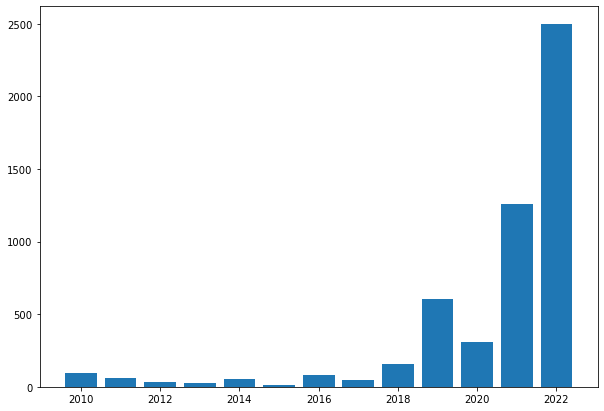

In [7]:
year= top_df['year']
score = top_df['total_score']
studio = top_df['studio_name']
quat = top_df['quarter']
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(year, score)
#plt.bar(quat, score)

# Show Plot
plt.show()

<AxesSubplot:>

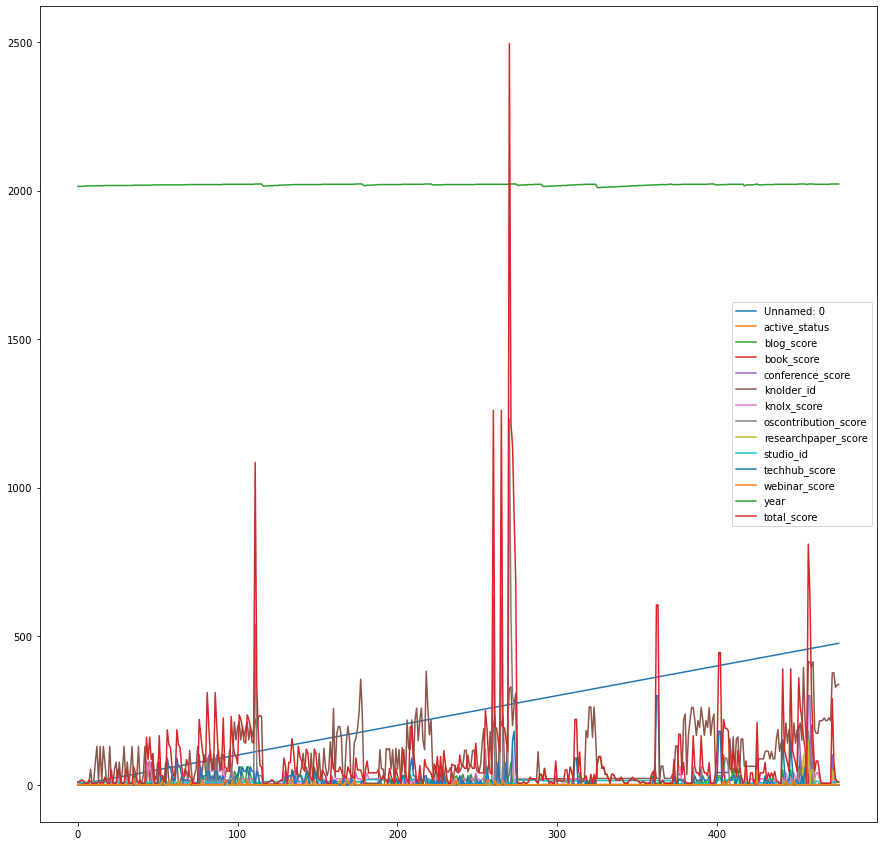

In [8]:
top_df.plot( figsize=(15,15))

/tmp/ipykernel_47038/759741789.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.vlines(top_df.mean(),     # Plot black line at mean
/tmp/ipykernel_47038/759741789.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.vlines(top_df.median(),   # Plot red line at median


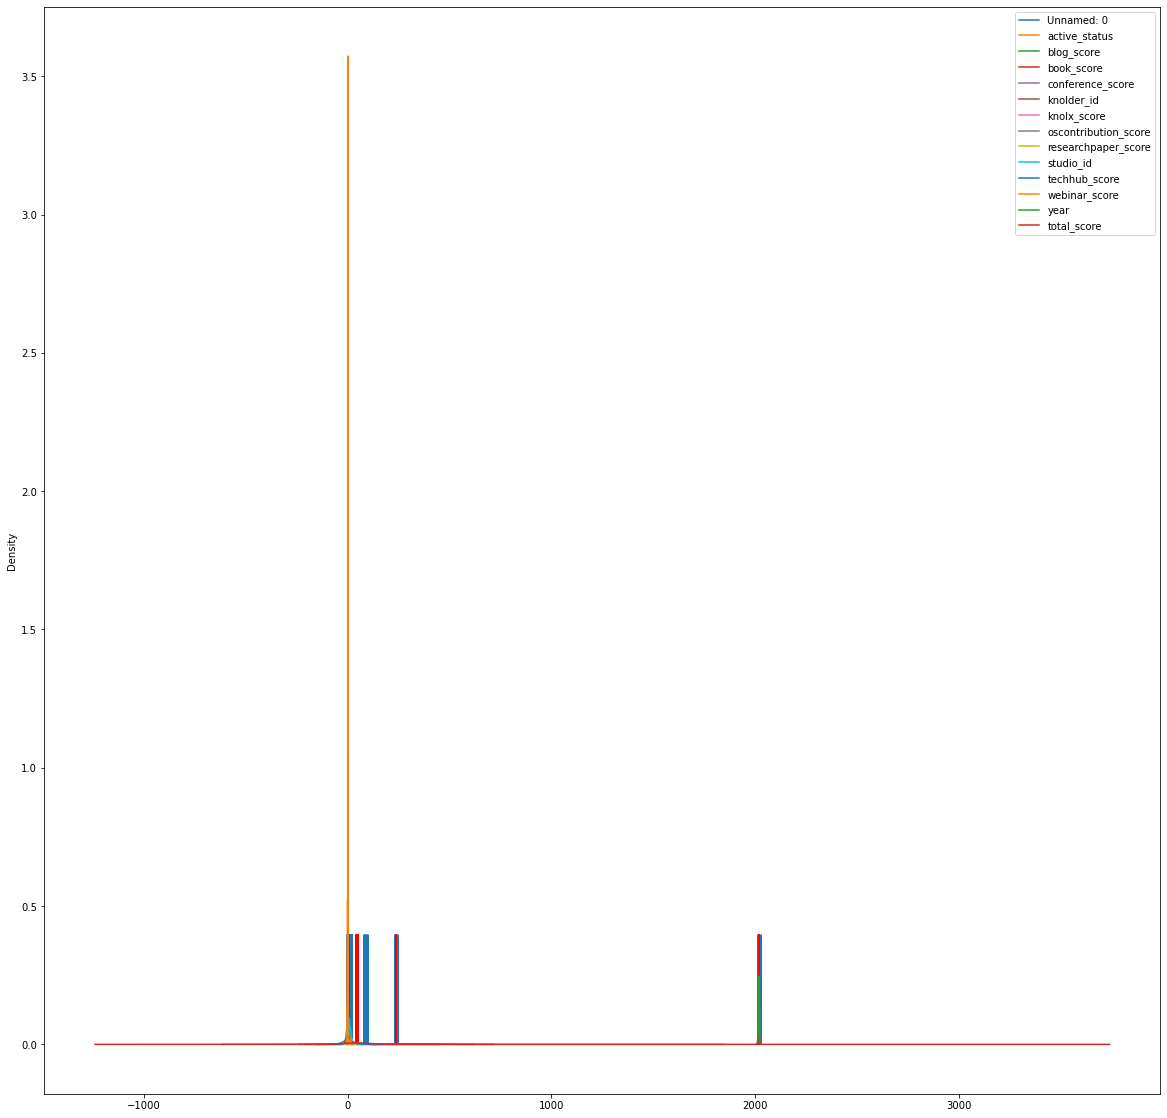

In [9]:
top_df.plot(kind="density",
              figsize=(20,20));

plt.vlines(top_df.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.4,
           linewidth=5.0);

plt.vlines(top_df.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.4, 
           linewidth=2.0,
           color="red");

In [10]:
##Measures of Spread (range)

max(top_df["total_score"]) - min(top_df["total_score"])
    

2490

In [11]:
##  IQR
top_df["total_score"].quantile(0.75) - top_df["total_score"].quantile(0.25)

70.0

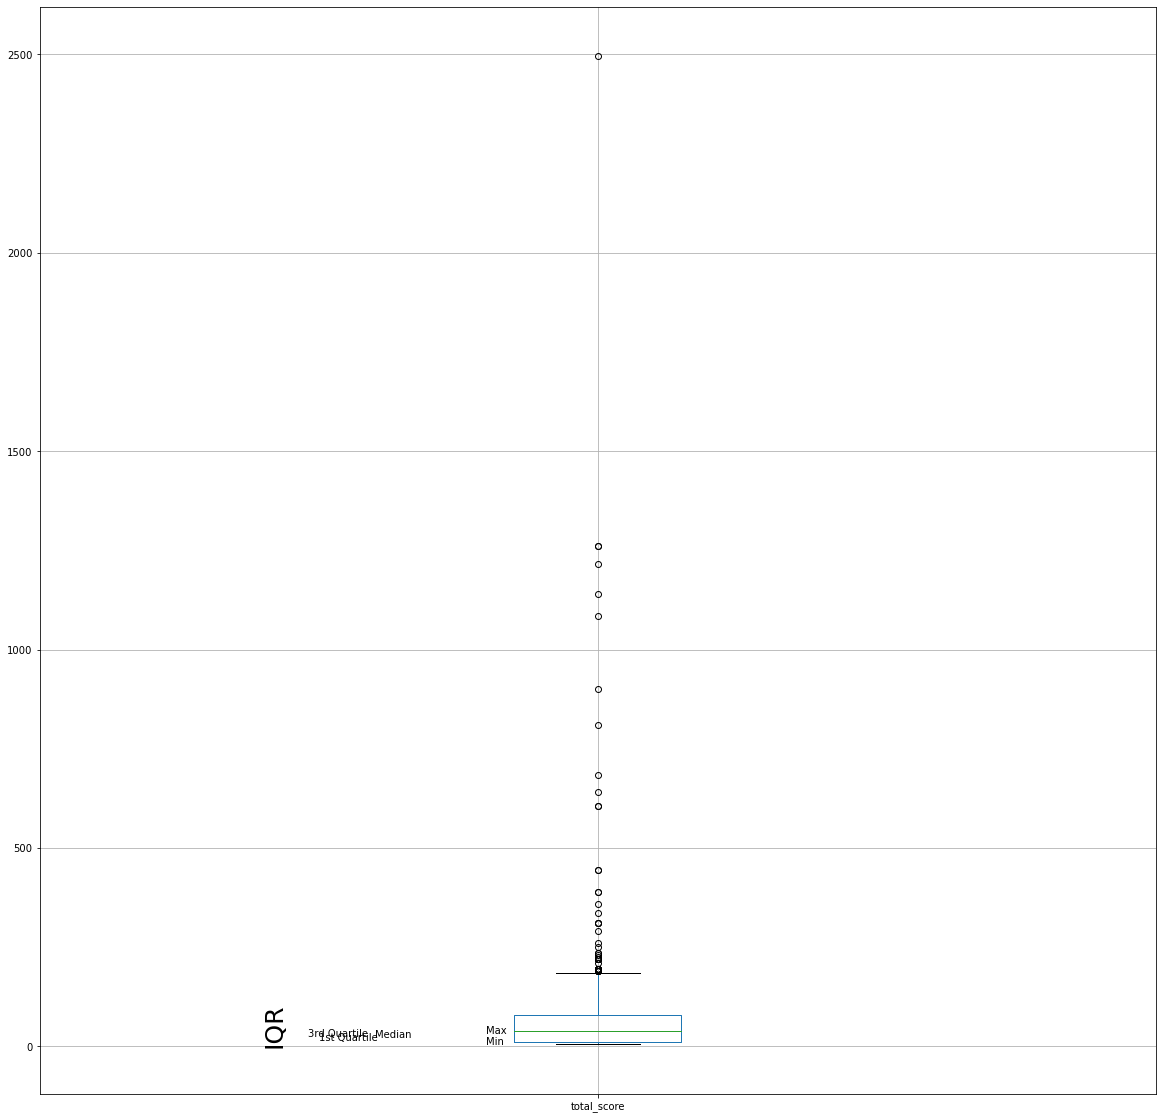

In [12]:
## BOX PLOT IQR
top_df.boxplot(column="total_score",
               return_type='axes',
               figsize=(20,20))

plt.text(x=0.74, y=26.25, s="3rd Quartile")
plt.text(x=0.8, y=22.75, s="Median")
plt.text(x=0.75, y=15.5, s="1st Quartile")
plt.text(x=0.9, y=5, s="Min")
plt.text(x=0.9, y=33.5, s="Max")
plt.text(x=0.7, y=10.5, s="IQR", rotation=90, size=25);

In [13]:
 # VARIANCE
top_df["total_score"].var()

35892.80363088636

<AxesSubplot:>

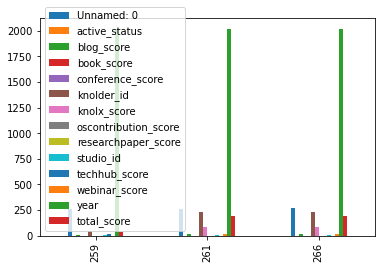

In [15]:
 dff = top_df[((top_df['year'] == 2021) &(top_df['studio_name']== 'DevOps Studio')
      & (top_df['total_score'])
      & (top_df['quarter']))]

dff.plot.bar()


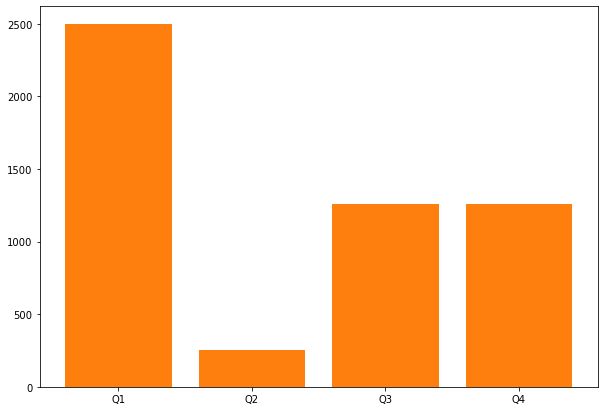

In [16]:
## ONLY MANAGEMNT STUDIO IN DATASET 2010,2011,2012,2013

year= top_df['year'] == 2010
score = top_df['total_score']
studio = top_df['studio_name'] == 'Management'
quat = top_df['quarter'] 
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
#plt.(year, score)
plt.scatter(quat, score)
#plt.bar(studio, score, color='green')

# Show Plot
plt.show()

<BarContainer object of 2 artists>

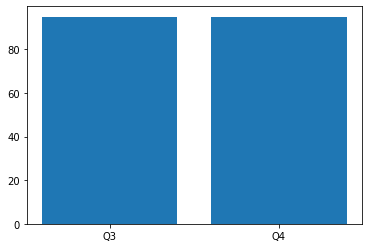

In [17]:
DF = top_df[((top_df['year'] == 2010) &(top_df['studio_name']== 'Management')
      & (top_df['total_score'])
      & (top_df['quarter']))]
    

#DF[["total_score"]].plot.bar()
ax = plt.subplot()
ax.bar(DF["quarter"], DF["total_score"])
#ax.bar(DF["quarter"], DF["full_name"])




In [20]:
DF.shape


(47, 17)

<BarContainer object of 47 artists>

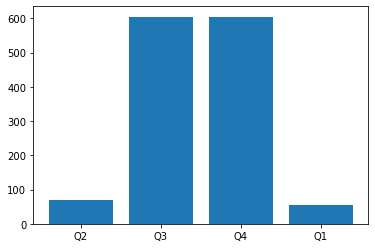

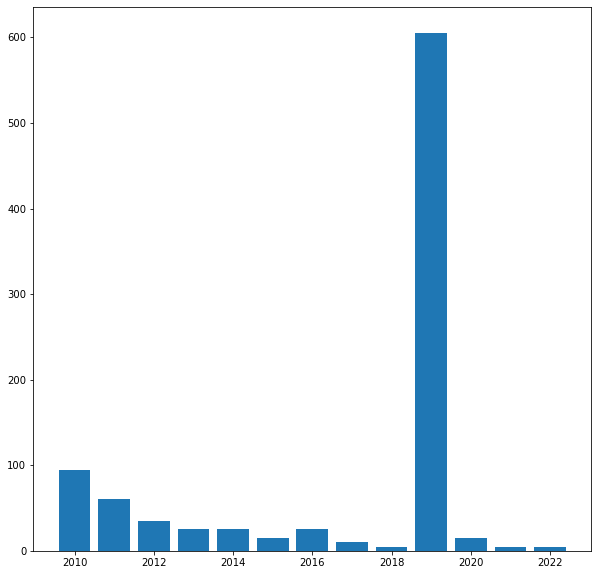

In [19]:
###  STudio name = Management ####

DF = top_df[((top_df['studio_name']== 'Management')
      )]


ax = plt.subplot()
fig = plt.figure(figsize =(10,10))


ax.bar(DF["quarter"], DF["total_score"])

plt.bar(DF["year"], DF["total_score"])


#plt.plot(DF["year"], DF["total_score"])
#plt.scatter(DF["year"], DF["quarter"])




In [21]:
DF.shape

(47, 17)

<BarContainer object of 116 artists>

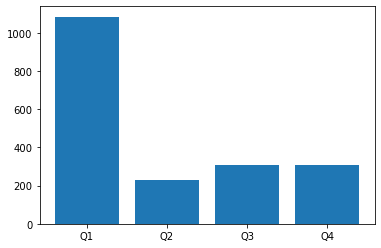

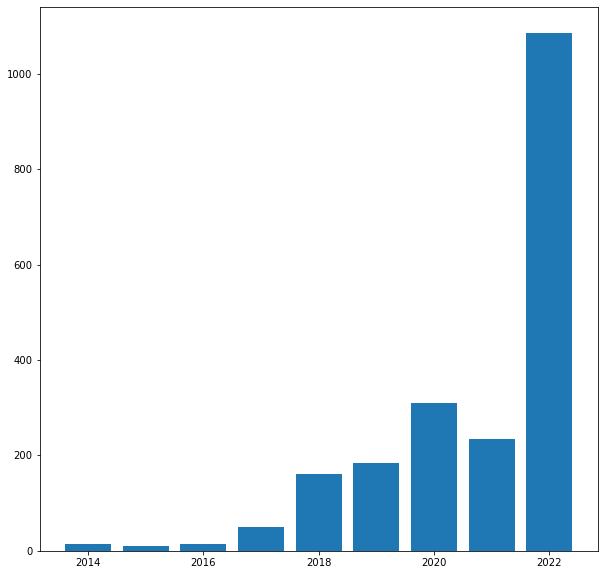

In [5]:
###  STudio name = 'Scala Studio' ####

DF2 = top_df[((top_df['studio_name']== 'Scala Studio')
      )]


ax = plt.subplot()
fig = plt.figure(figsize =(10,10))


ax.bar(DF2["quarter"], DF2["total_score"])

plt.bar(DF2["year"], DF2["total_score"])


#plt.plot(DF["year"], DF["total_score"])
#plt.scatter(DF["year"], DF["quarter"])




In [6]:
DF2

Unnamed: 0  active_status  blog_score  book_score  conference_score  \
0             0              1          10           0                 0   
1             1              1          10           0                 0   
2             2              1          15           0                 0   
3             3              1          15           0                 0   
4             4              1          10           0                 0   
..          ...            ...         ...         ...               ...   
111         111              1           5           0                 0   
112         112              1           5           0                 0   
113         113              1           5           0                 0   
114         114              1           5           0                 0   
115         115              1           0           0                 0   

                   full_name  knolder_id  knolx_score  oscontribution_score  \
0           Sidharth Khattri           1            0                     0   
1           Sidharth Khattri           1            0                     0   
2           Sidharth Khattri           1            0                     0   
3           Sidharth Khattri           1            0                     0   
4              Narayan Kumar           3            0                     0   
..                       ...         ...          ...                   ...   
111            Prateek Gupta         222            0                   540   
112          Kuldeepak Gupta         188           60                    60   
113            Purva Agrawal         227           20                    30   
114  Raviyanshu Pratap Singh         233            0                    30   
115             Rahul Khowal         230            0                    30   

    quarter  researchpaper_score  studio_id   studio_name  techhub_score  \
0        Q1                    0        8.0  Scala Studio              0   
1        Q2                    0        8.0  Scala Studio              0   
2        Q3                    0        8.0  Scala Studio              0   
3        Q4                    0        8.0  Scala Studio              0   
4        Q2                    0        8.0  Scala Studio              0   
..      ...                  ...        ...           ...            ...   
111      Q1                    0        8.0  Scala Studio              0   
112      Q1                    0        8.0  Scala Studio             45   
113      Q1                    0        8.0  Scala Studio             30   
114      Q1                    0        8.0  Scala Studio              0   
115      Q1                    0        8.0  Scala Studio              0   

     webinar_score  year  total_score  
0                0  2014           10  
1                0  2014           10  
2                0  2014           15  
3                0  2014           15  
4                0  2015           10  
..             ...   ...          ...  
111              0  2022         1085  
112              0  2022          335  
113              0  2022          165  
114              0  2022           65  
115              0  2022           60  

[116 rows x 17 columns]

<BarContainer object of 63 artists>

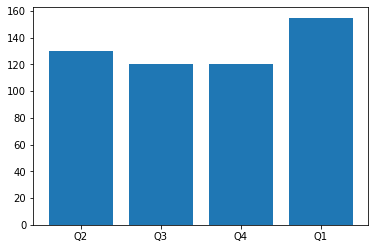

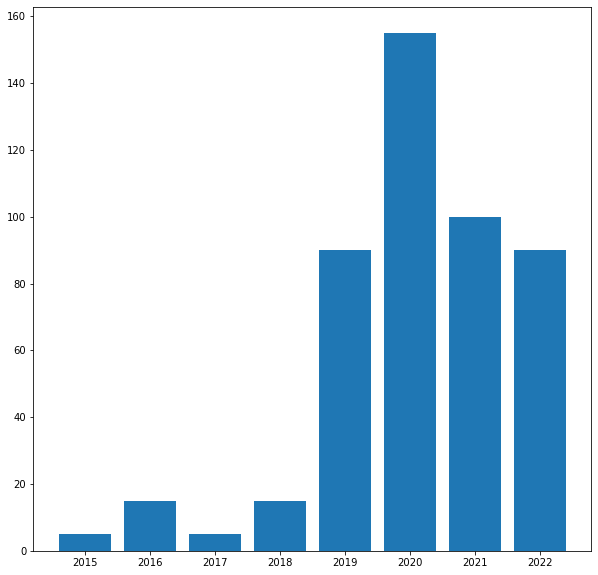

In [23]:
###  STudio name = 'Java Studio' ####

DF3 = top_df[((top_df['studio_name']== 'Java Studio')
      )]


ax = plt.subplot()
fig = plt.figure(figsize =(10,10))


ax.bar(DF3["quarter"], DF3["total_score"])

plt.bar(DF3["year"], DF3["total_score"])


#plt.plot(DF["year"], DF["total_score"])
#plt.scatter(DF["year"], DF["quarter"])


<BarContainer object of 43 artists>

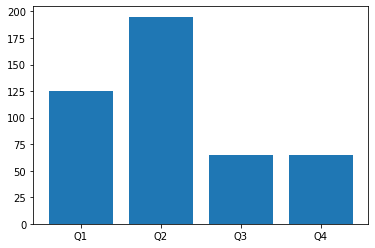

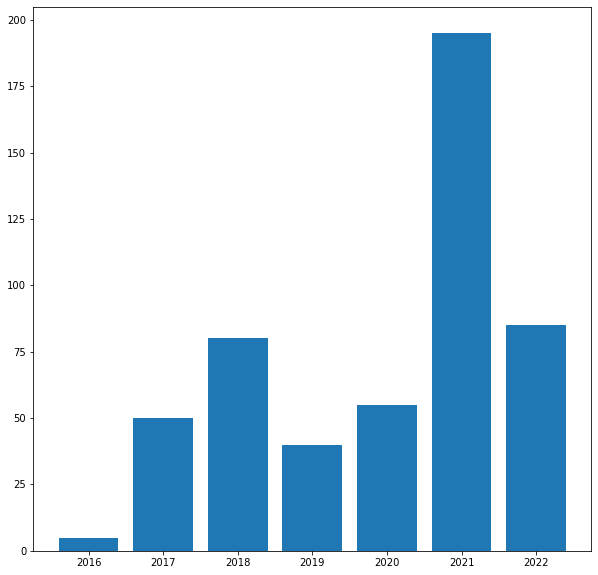

In [24]:
###  STudio name = 'Testing Automation Studio', ####

DF4 = top_df[((top_df['studio_name']== 'Testing Automation Studio')
      )]


ax = plt.subplot()
fig = plt.figure(figsize =(10,10))


ax.bar(DF4["quarter"], DF4["total_score"])

plt.bar(DF4["year"], DF4["total_score"])


#plt.plot(DF["year"], DF["total_score"])
#plt.scatter(DF["year"], DF["quarter"])


<BarContainer object of 53 artists>

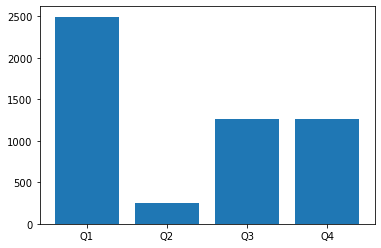

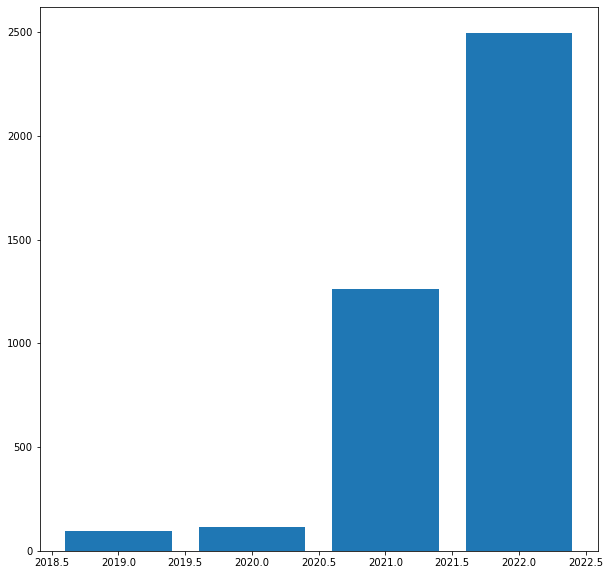

In [25]:
###  STudio name = 'DevOps Studio', ####

DF5 = top_df[((top_df['studio_name']== 'DevOps Studio')
      )]


ax = plt.subplot()
fig = plt.figure(figsize =(10,10))


ax.bar(DF5["quarter"], DF5["total_score"])

plt.bar(DF5["year"], DF5["total_score"])


#plt.plot(DF["year"], DF["total_score"])
#plt.scatter(DF["year"], DF["quarter"])


<BarContainer object of 16 artists>

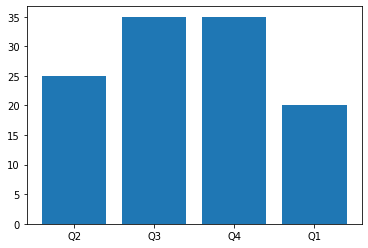

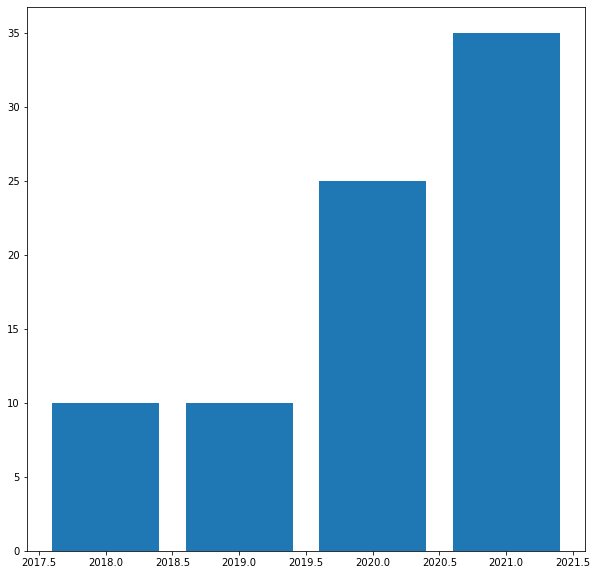

In [26]:
###  STudio name = 'marketting', ####

DF6 = top_df[((top_df['studio_name']== 'Marketing')
      )]


ax = plt.subplot()
fig = plt.figure(figsize =(10,10))


ax.bar(DF6["quarter"], DF6["total_score"])

plt.bar(DF6["year"], DF6["total_score"])

<BarContainer object of 34 artists>

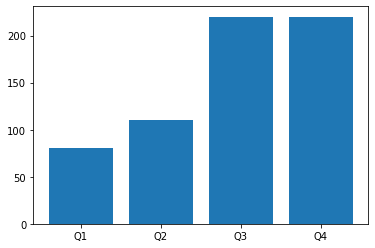

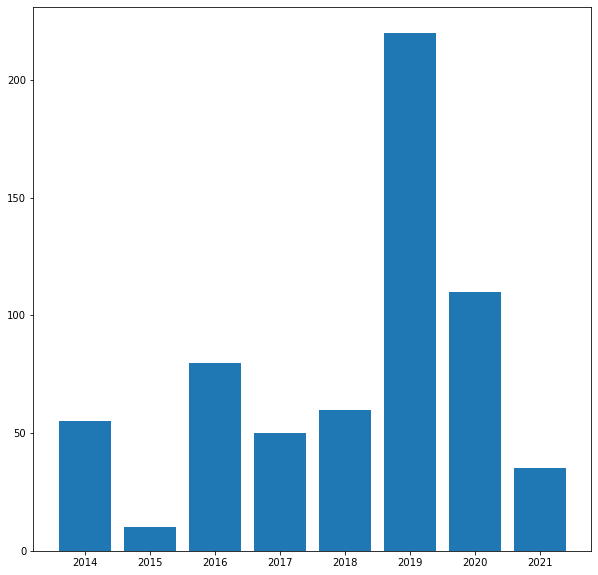

In [27]:
###  STudio name = 'Lightbend CoE' ####

DF7 = top_df[((top_df['studio_name']== 'Lightbend CoE')
      )]


ax = plt.subplot()
fig = plt.figure(figsize =(10,10))


ax.bar(DF7["quarter"], DF7["total_score"])

plt.bar(DF7["year"], DF7["total_score"])

<BarContainer object of 27 artists>

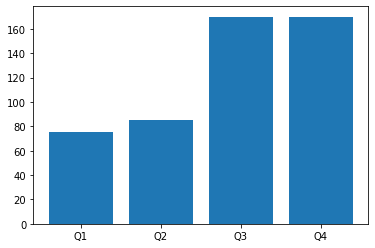

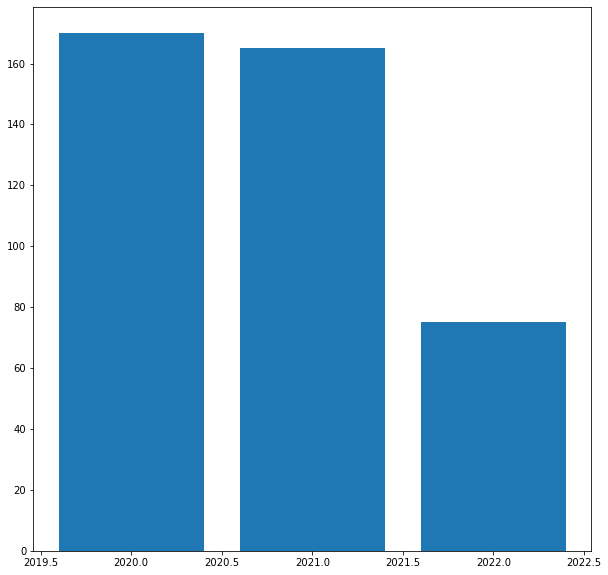

In [28]:
###  STudio name = 'AI/ML Studio' ####

DF8 = top_df[((top_df['studio_name']== 'AI/ML Studio')
      )]


ax = plt.subplot()
fig = plt.figure(figsize =(10,10))


ax.bar(DF8["quarter"], DF8["total_score"])

plt.bar(DF8["year"], DF8["total_score"])

<BarContainer object of 18 artists>

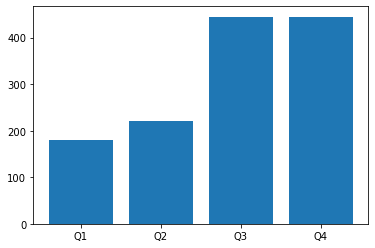

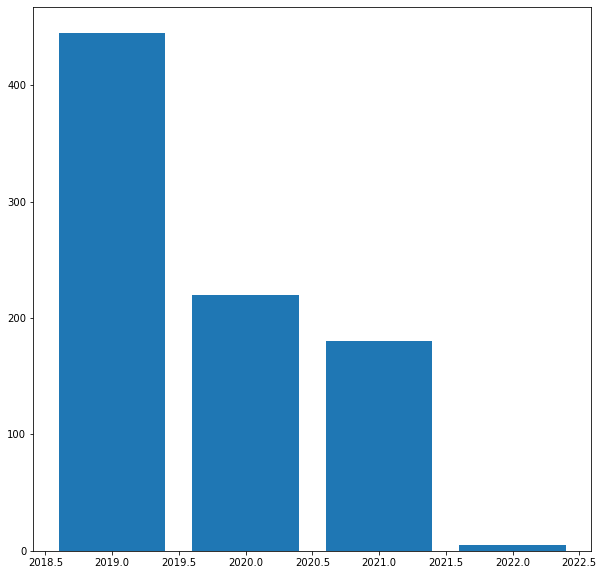

In [29]:
###  STudio name = 'Rust Studio' ####

DF9 = top_df[((top_df['studio_name']== 'Rust Studio')
      )]


ax = plt.subplot()
fig = plt.figure(figsize =(10,10))


ax.bar(DF9["quarter"], DF9["total_score"])

plt.bar(DF9["year"], DF9["total_score"])

<BarContainer object of 9 artists>

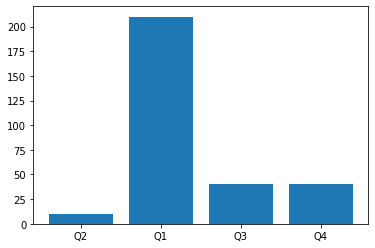

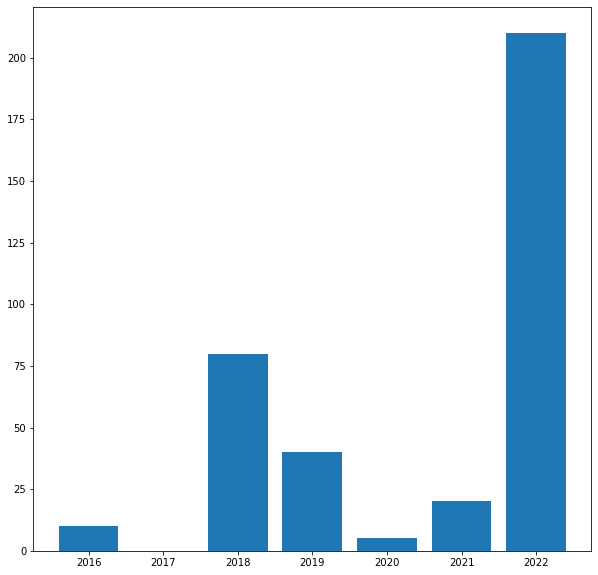

In [30]:
###  STudio name = 'Engineering Operations' ####

DF10 = top_df[((top_df['studio_name']== 'Engineering Operations')
      )]


ax = plt.subplot()
fig = plt.figure(figsize =(10,10))


ax.bar(DF10["quarter"], DF10["total_score"])

plt.bar(DF10["year"], DF10["total_score"])

<BarContainer object of 30 artists>

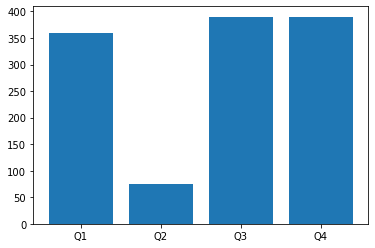

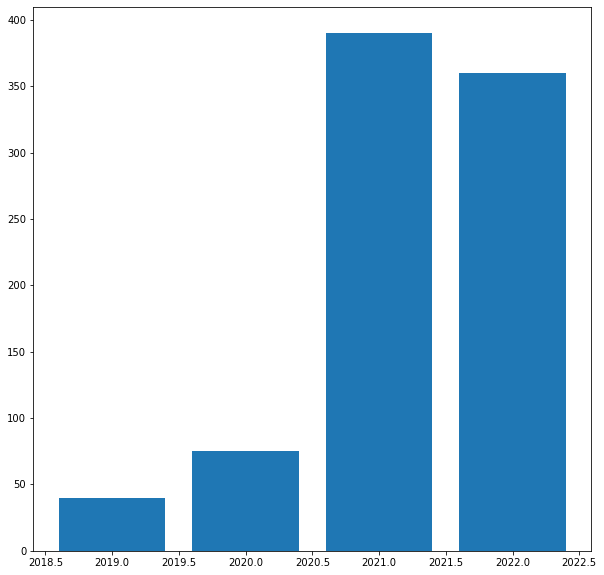

In [31]:
###  STudio name = 'Frontend Studio' ####

DF11 = top_df[((top_df['studio_name']== 'Frontend Studio')
      )]


ax = plt.subplot()
fig = plt.figure(figsize =(10,10))


ax.bar(DF11["quarter"], DF11["total_score"])

plt.bar(DF11["year"], DF11["total_score"])

<BarContainer object of 8 artists>

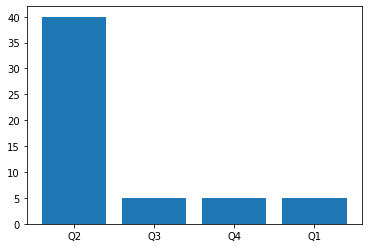

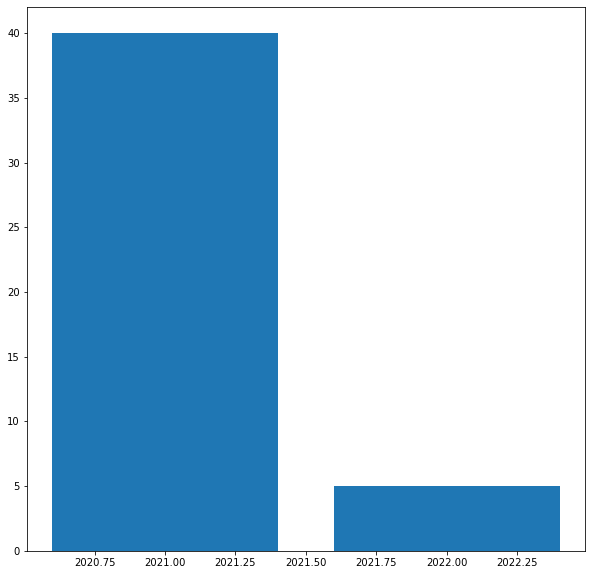

In [34]:
###  STudio name = 'Agile Studio' ####

DF12 = top_df[((top_df['studio_name']== 'Agile Studio')
      )]


ax = plt.subplot()
fig = plt.figure(figsize =(10,10))


ax.bar(DF12["quarter"], DF12["total_score"])

plt.bar(DF12["year"], DF12["total_score"])

<BarContainer object of 5 artists>

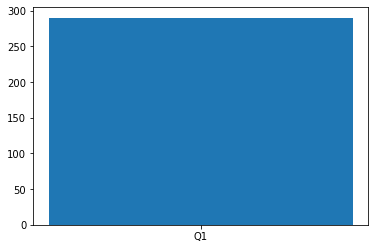

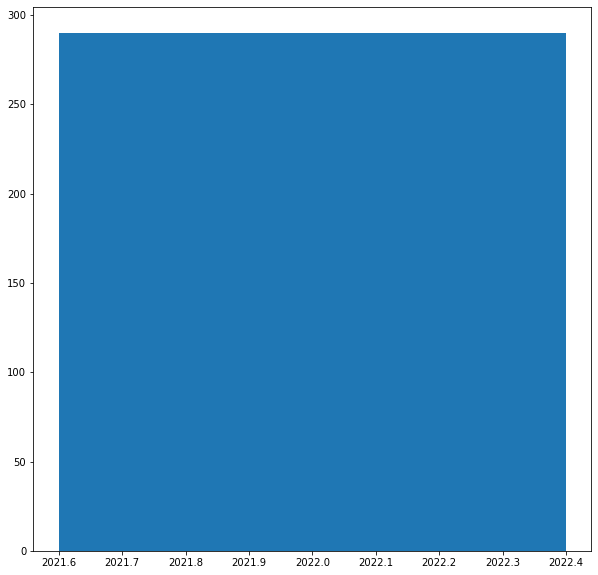

In [35]:
###  STudio name = 'Interns' ####

DF13 = top_df[((top_df['studio_name']== 'Interns')
      )]


ax = plt.subplot()
fig = plt.figure(figsize =(10,10))


ax.bar(DF13["quarter"], DF13["total_score"])

plt.bar(DF13["year"], DF13["total_score"])

<BarContainer object of 3 artists>

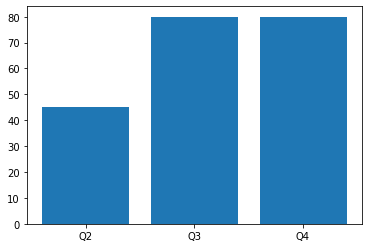

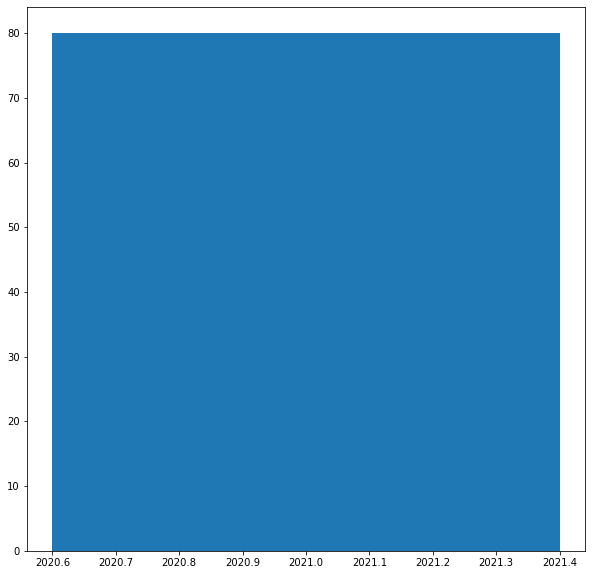

In [37]:
###  STudio name = 'Learning and Development'####
### ONLY DATA OF YEAR 2021

DF14 = top_df[((top_df['studio_name']== 'Learning and Development')
      )]


ax = plt.subplot()
fig = plt.figure(figsize =(10,10))


ax.bar(DF14["quarter"], DF14["total_score"])

plt.bar(DF14["year"], DF14["total_score"])

<BarContainer object of 5 artists>

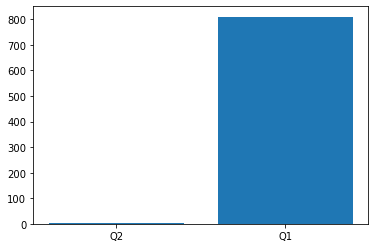

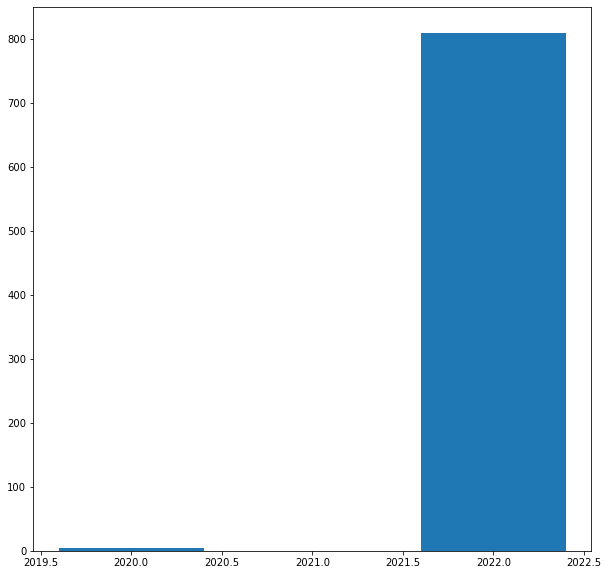

In [39]:
###  STudio name = 'Account Management' ####

DF14 = top_df[((top_df['studio_name']== 'Account Management')
      )]


ax = plt.subplot()
fig = plt.figure(figsize =(10,10))


ax.bar(DF14["quarter"], DF14["total_score"])

plt.bar(DF14["year"], DF14["total_score"])

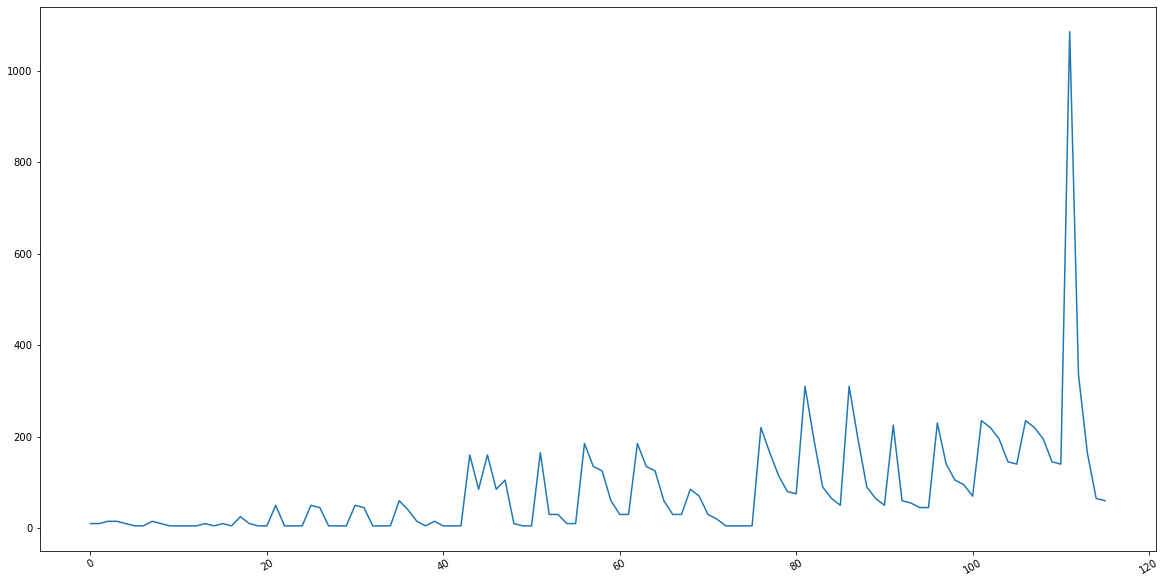

In [10]:

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pylab import rcParams
rcParams["figure.figsize"] = 20,10
plt.plot( DF2["total_score"])
plt.xticks(rotation=30)
plt.show()


## x axis wrong(not desirable)

<H1> Graphs for each studio are in  leaderboard analysis folder inside parent directory <h2>


In [1]:
columns=DF2.columns
dataframe = pd.DataFrame(columns = columns)




#for o in studio:
Q1=DF2.loc[(DF2['quarter']=='Q1') & (DF2['year']<=2022) & (DF2['studio_id'] == "Scala_studio")]
Q2=DF2.loc[(DF2['quarter']=='Q2') & (DF2['year']<=2022) & (DF2['studio_id'] == "Scala_studio")]
Q3=DF2.loc[(DF2['quarter']=='Q3') & (DF2['year']<=2022) & (DF2['studio_id'] == "Scala_studio")]
Q4=DF2.loc[(DF2['quarter']=='Q4') & (DF2['year']<=2022) & (DF2['studio_id'] == "Scala_studio")]
    
years = list(Q1['year'].unique())
 
for index in years:
    temp_Q1 = Q1.loc[Q1['year']==index]
    top_5_Q1 = list(temp_Q1['total_score'].nlargest(n=5).unique())
    for i in top_5_Q1:
        if i != 0:
            dataframe = dataframe.append(temp_Q1.loc[(temp_Q1['total_score']==i)], ignore_index = True)
    
    temp_Q2 = Q2.loc[Q2['year']==index]
    top_5_Q2 = list(temp_Q2['total_score'].nlargest(n=5).unique())
    for i in top_5_Q2:
        if i != 0:
            dataframe = dataframe.append(temp_Q2.loc[(temp_Q2['total_score']==i)], ignore_index = True)
            
    temp_Q3 = Q3.loc[Q3['year']==index]
    top_5_Q3 = list(temp_Q3['total_score'].nlargest(n=5).unique())
    for i in top_5_Q3:
        if i != 0:
            dataframe = dataframe.append(temp_Q3.loc[(temp_Q3['total_score']==i)], ignore_index = True)
            
    temp_Q4 = Q4.loc[Q4['year']==index]
    top_5_Q4 = list(temp_Q4['total_score'].nlargest(n=5).unique())
    for i in top_5_Q4:
        if i != 0:
            dataframe = dataframe.append(temp_Q4.loc[(temp_Q4['total_score']==i)], ignore_index = True)
    
    
    


NameError: name 'DF2' is not defined